In [2]:
!pip install seaborn

You should consider upgrading via the 'c:\users\me\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install sklearn

You should consider upgrading via the 'c:\users\me\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1317 sha256=acfa9a2bee7ccb4f57fe5e02f71097eb1b816f265f773a60d610ca4fe287c0eb
  Stored in directory: c:\users\me\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [8]:
!pip install plotly

You should consider upgrading via the 'c:\users\me\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


import plotly as py
import plotly.graph_objs as go

In [40]:
df = pd.read_csv(r"C:\Users\me\Desktop\CS\Mall_Customers.csv", index_col="CustomerID")
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [41]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [43]:
df.drop(columns=['Gender'], inplace=True)

c:\users\me\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age', ylabel='Density'>

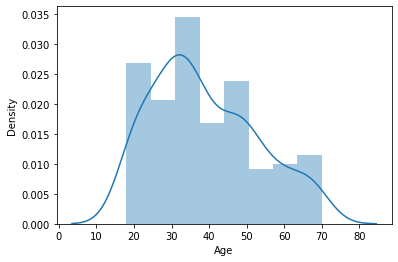

In [44]:
sns.distplot(df["Age"])

c:\users\me\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

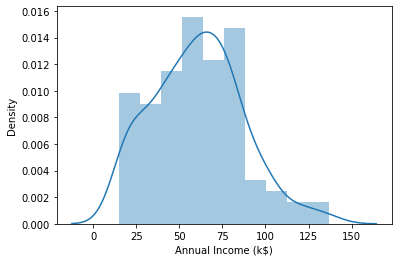

In [45]:
sns.distplot(df["Annual Income (k$)"])

c:\users\me\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

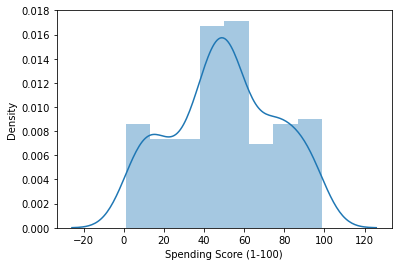

In [46]:
sns.distplot(df["Spending Score (1-100)"])

In [47]:
df1 = df[["Annual Income (k$)", "Spending Score (1-100)"]]

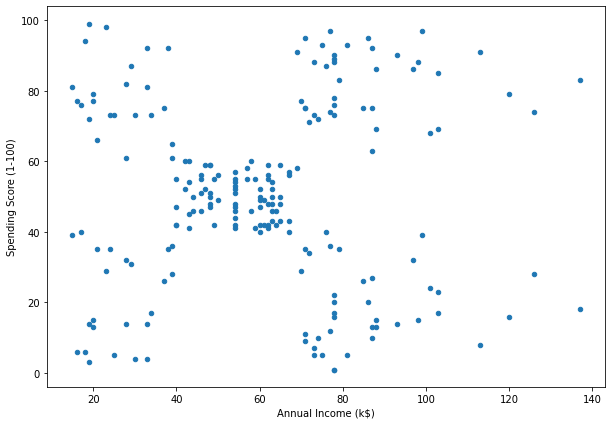

In [48]:
df1.plot(kind="scatter",
        x="Annual Income (k$)",
        y="Spending Score (1-100)",
        figsize=(10, 7))
plt.show()

In [49]:
sum_of_sqr_dist = {}

for k in range(1, 10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(df1)
    sum_of_sqr_dist[k] = km.inertia_

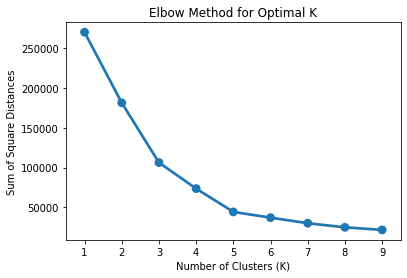

In [50]:
sns.pointplot(x=list(sum_of_sqr_dist.keys()), y=list(sum_of_sqr_dist.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")
plt.show()

In [51]:
Model = KMeans(n_clusters=5,
             init='k-means++',
             max_iter=1000)
Model.fit(df1)

KMeans(max_iter=1000, n_clusters=5)

In [52]:
print("Labels", Model.labels_)

Labels [4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 2 4 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 2 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 2 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [53]:
print("Centroids", Model.cluster_centers_)

Centroids [[25.72727273 79.36363636]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]


In [54]:
centroids = Model.cluster_centers_

In [55]:
df1_cluster = df1.copy()
df1_cluster["Cluster"] = Model.fit_predict(df1)

In [56]:
df1_cluster.head()

,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,
1,15,39,1
2,15,81,4
3,16,6,1
4,16,77,4
5,17,40,1


In [57]:
Color = ['red', 'blue', 'black', 'gold', 'navy']
df1_cluster['Color'] = df1_cluster['Cluster'].map(lambda p:Color[p])

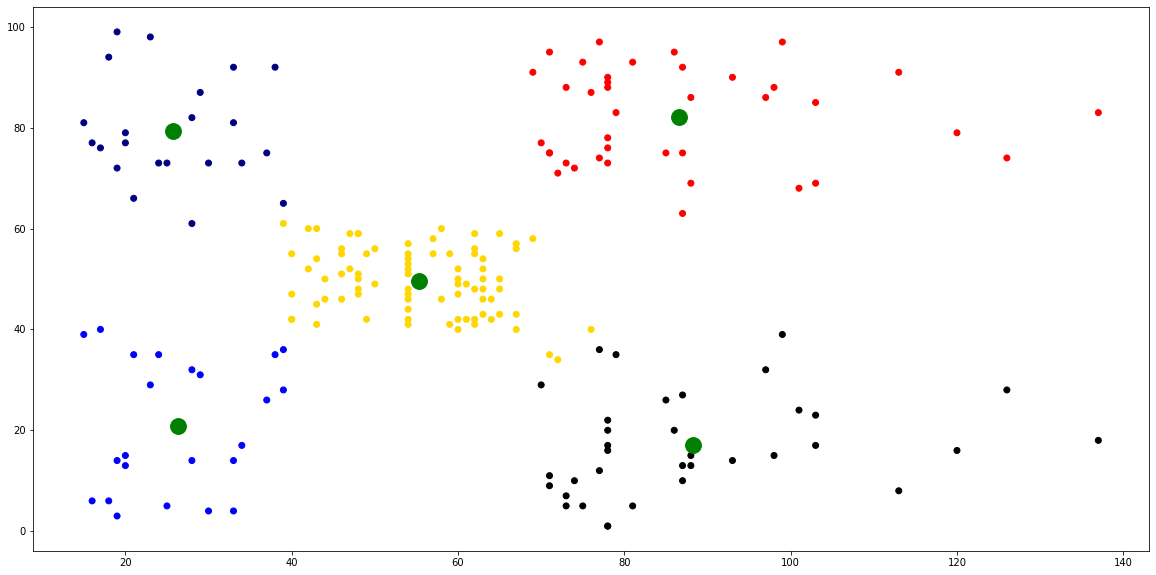

In [58]:
plt.figure(figsize=(20, 10))
plt.scatter(df1["Annual Income (k$)"],
           df1["Spending Score (1-100)"],
           c=df1_cluster["Color"])

plt.scatter(centroids[:, 0], centroids[:, 1], c='green', s=250)
plt.show()

In [59]:
labels = Model.labels_

In [60]:
silhouette_score(df1, labels)

0.553931997444648

In [61]:
silhouette = {}

for k in range(2,8):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km.fit(df1)
    silhouette[k] = silhouette_score(df1, km.labels_)

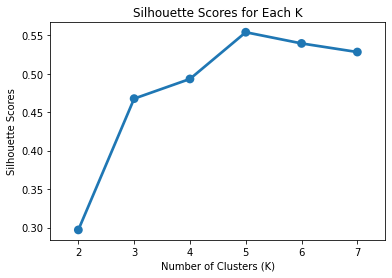

In [62]:
sns.pointplot(x=list(silhouette.keys()), y=list(silhouette.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Scores")
plt.title("Silhouette Scores for Each K")
plt.show()

In [63]:
df2= df.copy()

In [64]:
sum_of_sqr_dist = {}

for k in range(1, 10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(df2)
    sum_of_sqr_dist[k] = km.inertia_

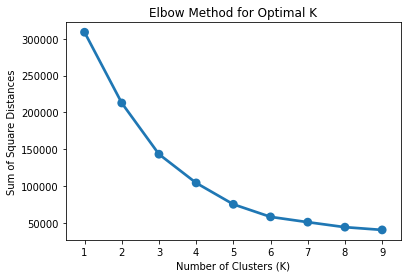

In [65]:
sns.pointplot(x=list(sum_of_sqr_dist.keys()), y=list(sum_of_sqr_dist.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")
plt.show()

In [66]:
Model2 = KMeans(n_clusters=6, init='k-means++', max_iter=1000)
Model2.fit(df2)

KMeans(max_iter=1000, n_clusters=6)

In [67]:
df2['Cluster'] = Model2.fit_predict(df2)
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,
1,19,15,39,2
2,21,15,81,3
3,20,16,6,2
4,23,16,77,3
5,31,17,40,2


In [68]:
labels = Model2.labels_
centroids = Model2.cluster_centers_

In [69]:
df2['labels'] = labels

trace = go.Scatter3d(
                    x = df2['Age'],
                    y = df2['Annual Income (k$)'],
                    z = df2['Spending Score (1-100)'],
                    mode = 'markers',
                    marker=dict(color=df2['labels'], size = 5, line=dict(color=df2['labels'], width=12), opacity=0.8)
                    )
    
data = [trace]
layout = go.Layout(
                    title='Clusters',
                    scene= dict(
                                xaxis = dict(title = 'Age'),
                                yaxis = dict(title = 'Annual Income (k$)'),
                                zaxis = dict(title = 'Spending Score (1-100)'))
                                )

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
plt.show()